In [1]:
import yfinance as yf

df= yf.Ticker("TCS.NS")
df

yfinance.Ticker object <TCS.NS>

In [2]:
df_historical = df.history(start="2021-06-02", end="2021-06-07", interval="1m")
df_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2021-06-02 09:15:00+05:30,3151.000000,3156.750000,3147.449951,3148.550049,0,0,0
2021-06-02 09:16:00+05:30,3148.550049,3150.600098,3144.050049,3148.850098,47423,0,0
2021-06-02 09:17:00+05:30,3148.000000,3148.850098,3145.199951,3148.850098,20462,0,0
2021-06-02 09:18:00+05:30,3148.850098,3150.000000,3145.250000,3145.250000,40375,0,0
2021-06-02 09:19:00+05:30,3141.699951,3143.550049,3140.000000,3142.000000,22806,0,0
...,...,...,...,...,...,...,...
2021-06-04 15:25:00+05:30,3143.600098,3143.649902,3142.000000,3142.600098,10965,0,0
2021-06-04 15:26:00+05:30,3142.550049,3142.600098,3141.600098,3142.199951,6555,0,0
2021-06-04 15:27:00+05:30,3142.149902,3143.000000,3141.100098,3141.949951,7885,0,0


In [40]:
newtime = yf.download(ticker, start = "2014-01-01", end = "2021-06-10")

[*********************100%***********************]  1 of 1 completed


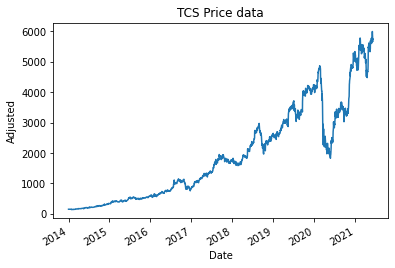

In [41]:
import matplotlib.pyplot as plt
newtime['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("TCS Price data")
plt.style.use('dark_background')
plt.show()

# SPECIF TIME INTERVAL (1 DAY)

In [52]:
newtime_daily = yf.download(ticker, start = "2014-01-01", end = "2021-06-10", period = "1d")
newtime_daily

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-01,156.000000,161.500000,156.000000,157.029999,153.453186,119950
2014-01-02,157.050003,158.005005,155.880005,156.919998,153.345703,69730
2014-01-03,157.179993,160.399994,153.865005,155.550003,152.006912,512820
2014-01-06,157.115005,158.000000,153.009995,155.145004,151.611130,476960
2014-01-07,155.524994,157.190002,154.529999,155.404999,151.865189,225390
...,...,...,...,...,...,...
2021-06-03,5840.000000,5915.000000,5780.149902,5901.500000,5901.500000,2230378
2021-06-04,5915.000000,6010.000000,5900.000000,5993.450195,5993.450195,2445367
2021-06-07,5800.000000,5843.850098,5682.450195,5729.750000,5729.750000,2835805


# CALCULATE THE DAILY RETURNS

In [54]:
#let's import numpy for the "shift" function.

import numpy as np
df_daily_returns = (newtime_daily['Adj Close'] / newtime_daily['Adj Close'].shift(1)) - 1
df_daily_returns

Date
2014-01-01         NaN
2014-01-02   -0.000700
2014-01-03   -0.008731
2014-01-06   -0.002604
2014-01-07    0.001676
                ...   
2021-06-03    0.015985
2021-06-04    0.015581
2021-06-07   -0.043998
2021-06-08    0.004477
2021-06-09   -0.014056
Name: Adj Close, Length: 1829, dtype: float64

In [64]:
#Let's transform the series to a data frame in order to facilitate the plotting
df_daily_returns = df_daily_returns.to_frame()
df_daily_returns.columns = ['Simple daily Return']

msft_daily_returns['Simple daily Return'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("TCS Price data")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

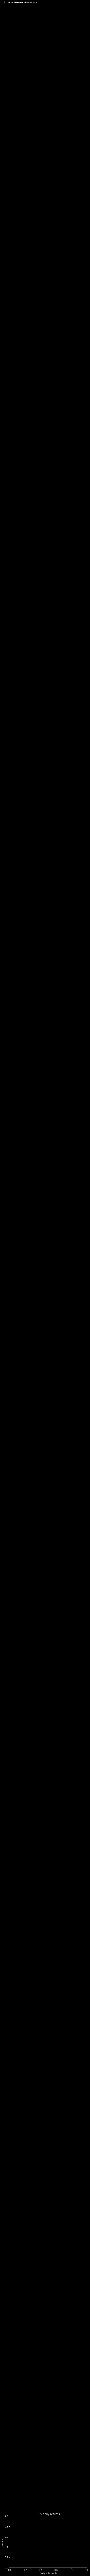

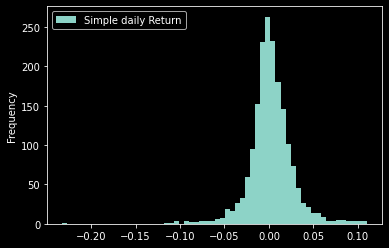

In [65]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
df_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("TCS daily returns")
ax1.text(-0.075,50,"Extreme Low returns")
ax1.text(0.05,50,"Extreme High returns")
plt.show()

# Earnings

In [3]:
df.earnings

,Revenue,Earnings
Year,,
2018,1231040000000,258260000000
2019,1464630000000,314720000000
2020,1569490000000,323400000000
2021,0,0


# Quarterly Earnings

In [4]:
df.quarterly_earnings

,Revenue,Earnings
Quarter,,
2Q2020,0,0
3Q2020,0,0
4Q2020,0,0
1Q2021,0,0


# Actions

In [5]:
df.actions

,Dividends,Stock Splits
Datetime,,


# splits

In [6]:
df.splits

Series([], Name: Stock Splits, dtype: int64)

# Financials

In [7]:
df.financials

,2021-03-31,2020-03-31,2019-03-31,2018-03-31
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,NaN,422480000000.0,415630000000.0,340920000000.0
Minority Interest,NaN,6230000000.0,4530000000.0,4020000000.0
Net Income,0.0,323400000000.0,314720000000.0,258260000000.0
Selling General Administrative,NaN,27020000000.0,42620000000.0,39380000000.0
Gross Profit,0.0,690920000000.0,659470000000.0,540080000000.0
Ebit,0.0,385810000000.0,374560000000.0,305180000000.0
Operating Income,NaN,385810000000.0,374560000000.0,305180000000.0
Other Operating Expenses,NaN,242800000000.0,221730000000.0,175380000000.0


# Quarterly Financials

In [8]:
df.quarterly_financials

,2021-03-31,2020-12-31,2020-09-30,2020-06-30
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,None,None,None,None
Minority Interest,None,None,None,None
Net Income,0.0,0.0,0.0,0.0
Selling General Administrative,None,None,None,None
Gross Profit,0.0,0.0,0.0,0.0
Ebit,0.0,0.0,0.0,0.0
Operating Income,None,None,None,None
Other Operating Expenses,None,None,None,None


# Major Holders

In [9]:
df.major_holders

,0,1
0,72.20%,% of Shares Held by All Insider
1,16.44%,% of Shares Held by Institutions
2,59.14%,% of Float Held by Institutions
3,332,Number of Institutions Holding Shares


# Institutional Holders

In [10]:
df.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,Invesco Developing Markets Fund,29442588,2021-01-31,0.0080,91606196173
1,Vanguard International Stock Index-Total Intl ...,13193058,2021-01-31,0.0036,41048221008
2,Vanguard International Stock Index-Emerging Ma...,13000374,2021-01-31,0.0035,40448713644
3,iShares Core MSCI Emerging Markets ETF,8110499,2021-03-31,0.0022,25773949247
4,JP Morgan Emerging Markets Equity Fund,7557900,2021-01-31,0.0020,23515272165
5,Fidelity Series Emerging Markets Opportunities...,6688143,2021-03-31,0.0018,21253915232
6,iShares MSCI India ETF,6570724,2021-03-31,0.0018,20880775263
7,Virtus Opportunities Tr-Virtus Vontobel Emergi...,4916227,2021-03-31,0.0013,15623031971
8,MFS Institutional International Equity Fund,3807059,2021-03-31,0.0010,12098262443
9,"Harding, Loevner Funds, Inc.-Institutional Eme...",3625621,2021-01-31,0.0010,11280575898


# Balance Sheet

In [11]:
df.balance_sheet

,2021-03-31,2020-03-31,2019-03-31,2018-03-31
Intangible Assets,NaN,2.830000e+09,1.790000e+09,1.200000e+08
Total Liab,NaN,3.615000e+11,2.504400e+11,2.076600e+11
Total Stockholder Equity,NaN,8.412600e+11,8.944600e+11,8.512800e+11
Minority Interest,NaN,6.230000e+09,4.530000e+09,4.020000e+09
Deferred Long Term Liab,NaN,2.860000e+09,1.740000e+09,9.500000e+08
Other Current Liab,NaN,9.520000e+10,7.629000e+10,5.801000e+10
Total Assets,NaN,1.208990e+12,1.149430e+12,1.062960e+12
Common Stock,NaN,3.750000e+09,3.750000e+09,1.910000e+09
Other Current Assets,NaN,1.837000e+10,1.891000e+10,1.318000e+10
Retained Earnings,NaN,8.080600e+11,8.688900e+11,8.301400e+11


# Quarterly Balance Sheet

In [12]:
df.quarterly_balance_sheet

,2021-03-31,2020-12-31,2020-09-30,2020-06-30


# Cashflow

In [13]:
df.cashflow

,2021-03-31,2020-03-31,2019-03-31,2018-03-31
Net Income,0.0,3.234000e+11,3.147200e+11,2.582600e+11
Change To Liabilities,0.0,8.210000e+09,2.175000e+10,7.580000e+09
Investments,NaN,8.389000e+10,4.068000e+10,4.383000e+10
Total Cashflows From Investing Activities,NaN,8.565000e+10,1.596000e+10,2.886000e+10
Net Borrowings,NaN,-1.062000e+10,-1.940000e+09,-4.300000e+08
Total Cash From Financing Activities,NaN,-3.991500e+11,-2.789700e+11,-2.688500e+11
Change To Operating Activities,NaN,-1.690000e+10,-2.763000e+10,2.312000e+10
Change In Cash,NaN,1.422000e+10,2.341000e+10,1.286000e+10
Effect Of Exchange Rate,NaN,4.030000e+09,4.900000e+08,2.180000e+09
Total Cash From Operating Activities,NaN,3.236900e+11,2.859300e+11,2.506700e+11


# Quarterly Cashflow

In [14]:
df.quarterly_cashflow

,2021-03-31,2020-12-31,2020-09-30,2020-06-30
Net Income,0.0,0.0,0.0,0.0
Change To Liabilities,0.0,0.0,0.0,0.0


# Sustainability

In [15]:
df.sustainability

,Value
2021-5,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,6.9
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


# Price to Earnings Ratio

In [16]:
df.info['forwardPE']

34.511913

# Dividends

In [17]:
df.info['dividendRate']

38

# Dividends Date

In [18]:
df.dividends

Series([], Name: Dividends, dtype: int64)

# Market Cap

In [19]:
df.info["marketCap"]

12109949698048

# Volume

In [20]:
df.info["volume"]

3452723

# average volume over the last 24 hours

In [21]:
df.info["averageVolume"]

2799322

# average volume over the last 10 days

In [22]:
df.info["averageVolume10days"]

1931801

# Highs and Lows

In [23]:
df_historical = df.history(period="max", interval="1wk")
df_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-08-12,28.857001,30.095861,26.621468,27.105835,2001184.0,0.0,0.0
2002-08-19,27.329386,32.508370,26.183676,31.521009,18564720.0,0.0,0.0
2002-08-26,32.024007,33.626140,30.021342,32.825073,12945024.0,0.0,0.0
2002-09-02,33.346704,34.259546,30.561603,30.906246,6795040.0,0.0,0.0
2002-09-09,29.434505,32.210289,29.434505,30.542955,2637016.0,0.0,0.0
...,...,...,...,...,...,...,...
2021-05-24,3066.500041,3202.086811,3057.046285,3128.297852,13141112.0,0.0,0.0
2021-05-25,NaN,NaN,NaN,NaN,NaN,15.0,0.0
2021-05-31,3150.000000,3170.350098,3115.000000,3143.750000,8388084.0,0.0,0.0


# 52 WEEK HIGH

In [24]:
df.info["fiftyTwoWeekHigh"]

3354.35

# 52 Week Low

In [25]:
df.info["fiftyTwoWeekLow"]

2000.95

# Analysts Recommendations

In [26]:
df.recommendations

# Next Event

In [27]:
df.calendar

,Value
Earnings Date,2021-07-08 00:00:00
Earnings Average,None
Earnings Low,None
Earnings High,None
Revenue Average,379276000000
Revenue Low,369641000000
Revenue High,386329000000


# options data Expiration dates

In [28]:
df.options

IndexError: list index out of range

# Option Calls Data

In [29]:
# get option chain calls data for specific expiration date
opt = df.option_chain(date='2021-06-24')
opt.calls

IndexError: list index out of range

# Option Puts Data

In [30]:
opt.puts

NameError: name 'opt' is not defined

# multiple tickers

In [31]:
data = yf.download("^NSEI ^BSESN ^NSEBANK", start="2020-01-01", end="2021-06-10")
data

[*********************100%***********************]  3 of 3 completed


Adj Close                                     Close  \
                  ^BSESN      ^NSEBANK         ^NSEI        ^BSESN   
Date                                                                 
2020-01-01           NaN           NaN  12182.500000           NaN   
2020-01-02  41626.640625  32443.849609  12282.200195  41626.640625   
2020-01-03  41464.609375  32069.250000  12226.650391  41464.609375   
2020-01-06  40676.628906  31237.150391  11993.049805  40676.628906   
2020-01-07  40869.468750  31399.400391  12052.950195  40869.468750   
...                  ...           ...           ...           ...   
2021-06-03  52232.429688  35649.000000  15690.349609  52232.429688   
2021-06-04  52100.050781  35291.648438  15670.250000  52100.050781   
2021-06-07  52328.511719  35443.648438  15751.650391  52328.511719   
2021-06-08  52275.570312  35085.300781  15740.099609  52275.570312   
2021-06-09  51941.640625  34800.500000  15635.349609  51941.640625   

                                                High                \
                ^NSEBANK         ^NSEI        ^BSESN      ^NSEBANK   
Date                                                                 
2020-01-01           NaN  12182.500000           NaN           NaN   
2020-01-02  32443.849609  12282.200195  41649.289062  32465.449219   
2020-01-03  32069.250000  12226.650391  41636.179688  32329.800781   
2020-01-06  31237.150391  11993.049805  41378.339844  31914.449219   
2020-01-07  31399.400391  12052.950195  41230.140625  31851.449219   
...                  ...           ...           ...           ...   
2021-06-03  35649.000000  15690.349609  52273.230469  35723.699219   
2021-06-04  35291.648438  15670.250000  52389.019531  35810.898438   
2021-06-07  35443.648438  15751.650391  52378.691406  35545.851562   
2021-06-08  35085.300781  15740.099609  52432.429688  35449.500000   
2021-06-09  34800.500000  15635.349609  52446.921875  35402.449219   

                                   Low                              \
                   ^NSEI        ^BSESN      ^NSEBANK         ^NSEI   
Date                                                                 
2020-01-01  12222.200195           NaN           NaN  12165.299805   
2020-01-02  12289.900391  41328.449219  32121.400391  12195.250000   
2020-01-03  12265.599609  41348.679688  31960.400391  12191.349609   
2020-01-06  12179.099609  40613.960938  31170.550781  11974.200195   
2020-01-07  12152.150391  40727.371094  31200.900391  12005.349609   
...                  ...           ...           ...           ...   
2021-06-03  15705.099609  51942.199219  35413.000000  15611.000000   
2021-06-04  15733.599609  51952.699219  35176.148438  15622.349609   
2021-06-07  15773.450195  52054.761719  35338.550781  15678.099609   
2021-06-08  15778.799805  52135.039062  34962.648438  15680.000000   
2021-06-09  15800.450195  51717.070312  34641.199219  15566.900391   

                    Open                               Volume            \
                  ^BSESN      ^NSEBANK         ^NSEI   ^BSESN  ^NSEBANK   
Date                                                                      
2020-01-01           NaN           NaN  12202.150391      NaN       NaN   
2020-01-02  41340.269531  32133.150391  12198.549805   5300.0  253600.0   
2020-01-03  41634.511719  32326.949219  12261.099609   8900.0  217600.0   
2020-01-06  41378.339844  31910.449219  12170.599609   8700.0  256200.0   
2020-01-07  40983.039062  31598.050781  12079.099609  11900.0  294400.0   
...                  ...           ...           ...      ...       ...   
2021-06-03  52121.578125  35536.449219  15655.549805  15000.0       0.0   
2021-06-04  52367.519531  35657.851562  15712.500000  16700.0       0.0   
2021-06-07  52231.378906  35460.800781  15725.099609  19800.0       0.0   
2021-06-08  52428.718750  35433.800781  15773.900391  12300.0       0.0   
2021-06-09  52401.410156  35114.250000  15766.299805  15200.0       0.0   

                    


In [32]:
data = yf.download("^NSEI ^BSESN ^NSEBANK", start="2020-01-01", end="2021-06-10", group_by='tickers')
data

[*********************100%***********************]  3 of 3 completed


^NSEI                                            \
                    Open          High           Low         Close   
Date                                                                 
2020-01-01  12202.150391  12222.200195  12165.299805  12182.500000   
2020-01-02  12198.549805  12289.900391  12195.250000  12282.200195   
2020-01-03  12261.099609  12265.599609  12191.349609  12226.650391   
2020-01-06  12170.599609  12179.099609  11974.200195  11993.049805   
2020-01-07  12079.099609  12152.150391  12005.349609  12052.950195   
...                  ...           ...           ...           ...   
2021-06-03  15655.549805  15705.099609  15611.000000  15690.349609   
2021-06-04  15712.500000  15733.599609  15622.349609  15670.250000   
2021-06-07  15725.099609  15773.450195  15678.099609  15751.650391   
2021-06-08  15773.900391  15778.799805  15680.000000  15740.099609   
2021-06-09  15766.299805  15800.450195  15566.900391  15635.349609   

                                        ^BSESN                              \
               Adj Close  Volume          Open          High           Low   
Date                                                                         
2020-01-01  12182.500000  304100           NaN           NaN           NaN   
2020-01-02  12282.200195  407700  41340.269531  41649.289062  41328.449219   
2020-01-03  12226.650391  428800  41634.511719  41636.179688  41348.679688   
2020-01-06  11993.049805  396500  41378.339844  41378.339844  40613.960938   
2020-01-07  12052.950195  447800  40983.039062  41230.140625  40727.371094   
...                  ...     ...           ...           ...           ...   
2021-06-03  15690.349609  410200  52121.578125  52273.230469  51942.199219   
2021-06-04  15670.250000  414200  52367.519531  52389.019531  51952.699219   
2021-06-07  15751.650391  394000  52231.378906  52378.691406  52054.761719   
2021-06-08  15740.099609  378200  52428.718750  52432.429688  52135.039062   
2021-06-09  15635.349609  457900  52401.410156  52446.921875  51717.070312   

                                                     ^NSEBANK                \
                   Close     Adj Close   Volume          Open          High   
Date                                                                          
2020-01-01           NaN           NaN      NaN           NaN           NaN   
2020-01-02  41626.640625  41626.640625   5300.0  32133.150391  32465.449219   
2020-01-03  41464.609375  41464.609375   8900.0  32326.949219  32329.800781   
2020-01-06  40676.628906  40676.628906   8700.0  31910.449219  31914.449219   
2020-01-07  40869.468750  40869.468750  11900.0  31598.050781  31851.449219   
...                  ...           ...      ...           ...           ...   
2021-06-03  52232.429688  52232.429688  15000.0  35536.449219  35723.699219   
2021-06-04  52100.050781  52100.050781  16700.0  35657.851562  35810.898438   
2021-06-07  52328.511719  52328.511719  19800.0  35460.800781  35545.851562   
2021-06-08  52275.570312  52275.570312  12300.0  35433.800781  35449.500000   
2021-06-09  51941.640625  51941.640625  15200.0  35114.250000  35402.449219   

                                                                
                     Low         Close     Adj Close    Volume  
Date                                                            
2020-01-01           NaN           NaN           NaN       NaN  
2020-01-02  32121.400391  32443.849609  32443.849609  253600.0  
2020-01-03  31960.400391  32069.250000  32069.250000  217600.0  
2020-01-06  31170.550781  31237.150391  31237.150391  256200.0  
2020-01-07  31200.900391  31399.400391  31399.400391  294400.0  
...                  ...           ...           ...       ...  
2021-06-03  35413.000000  35649.000000  35649.000000       0.0  
2021-06-04  35176.148438  35291.648438  35291.648438       0.0  
2021-06-07  35338.550781  35443.648438  35443.648438       0.0  
2021-06-08  34962.648438  35085.300781  35085.300781      

# Fundamentals data with multiple tickers at once

In [33]:
import pandas as pd

tickers_list = ["TATAPOWER.NS", "WIPRO.NS", "TCS.NS", "KOTAKBANK.NS", "BAJFINANCE.NS"] # example list
tickers_data= {} # empty dictionary

In [34]:
for ticker in tickers_list:
    ticker_object = yf.Ticker(ticker)

    #convert info() output from dictionary to dataframe
    temp = pd.DataFrame.from_dict(ticker_object.info, orient="index")
    temp.reset_index(inplace=True)
    temp.columns = ["Attribute", "Recent"]
    
    # add (ticker, dataframe) to main dictionary
    tickers_data[ticker] = temp

tickers_data

{'TATAPOWER.NS':                     Attribute  \
 0                         zip   
 1                      sector   
 2         longBusinessSummary   
 3                        city   
 4                       phone   
 ..                        ...   
 118  impliedSharesOutstanding   
 119                  category   
 120     fiveYearAverageReturn   
 121        regularMarketPrice   
 122                  logo_url   
 
                                                 Recent  
 0                                              400 001  
 1                                            Utilities  
 2    The Tata Power Company Limited engages in the ...  
 3                                               Mumbai  
 4                                      91 22 6665 8282  
 ..                                                 ...  
 118                                               None  
 119                                               None  
 120                                               N

# combine this dictionary of dataframes into a single dataframe

In [35]:
combined_data = pd.concat(tickers_data)
combined_data = combined_data.reset_index()
combined_data

,level_0,level_1,Attribute,Recent
0,TATAPOWER.NS,0,zip,400 001
1,TATAPOWER.NS,1,sector,Utilities
2,TATAPOWER.NS,2,longBusinessSummary,The Tata Power Company Limited engages in the ...
3,TATAPOWER.NS,3,city,Mumbai
4,TATAPOWER.NS,4,phone,91 22 6665 8282
...,...,...,...,...
611,BAJFINANCE.NS,118,impliedSharesOutstanding,None
612,BAJFINANCE.NS,119,category,None
613,BAJFINANCE.NS,120,fiveYearAverageReturn,None
614,BAJFINANCE.NS,121,regularMarketPrice,6120


In [36]:
del combined_data["level_1"] # clean up unnecessary column
combined_data.columns = ["Ticker", "Attribute", "Recent"] # update column names

combined_data

,Ticker,Attribute,Recent
0,TATAPOWER.NS,zip,400 001
1,TATAPOWER.NS,sector,Utilities
2,TATAPOWER.NS,longBusinessSummary,The Tata Power Company Limited engages in the ...
3,TATAPOWER.NS,city,Mumbai
4,TATAPOWER.NS,phone,91 22 6665 8282
...,...,...,...
611,BAJFINANCE.NS,impliedSharesOutstanding,None
612,BAJFINANCE.NS,category,None
613,BAJFINANCE.NS,fiveYearAverageReturn,None
614,BAJFINANCE.NS,regularMarketPrice,6120


# Comparing by a particular attribute

In [37]:
employees = combined_data[combined_data["Attribute"]=="fullTimeEmployees"].reset_index()
del employees["index"] # clean up unnecessary column

employees

,Ticker,Attribute,Recent
0,WIPRO.NS,fullTimeEmployees,197712
1,TCS.NS,fullTimeEmployees,488649


In [38]:
employees_sorted = employees.sort_values('Recent',ascending=False)
employees_sorted

,Ticker,Attribute,Recent
1,TCS.NS,fullTimeEmployees,488649
0,WIPRO.NS,fullTimeEmployees,197712


# IMPORT MANY STOCKS AT ONCE

In [42]:
import pandas as pd
import yfinance as yf
tickers = ["^NSEI", "^NSEBANK", "WIPRO.NS", "TCS.NS", "INFY.NS", "TECHM.NS", "HCLTECH.NS"]

In [43]:
manystocks = yf.download(tickers, start = "2014-01-01", end = "2021-06-10", period = "1d")

[*********************100%***********************]  7 of 7 completed


In [44]:
manystocks

Adj Close                                                     \
            HCLTECH.NS      INFY.NS       TCS.NS     TECHM.NS    WIPRO.NS   
Date                                                                        
2014-01-01  276.046753   357.416199   918.317322   397.026550  194.602112   
2014-01-02  274.412720   358.709625   924.160156   394.420380  194.690125   
2014-01-03  276.320953   367.428558   947.701172   398.633636  195.975281   
2014-01-06  274.324921   362.558960   955.122009   394.366089  196.468170   
2014-01-07  275.575195   356.298004   940.856323   391.803345  193.721878   
...                ...          ...          ...          ...         ...   
2021-06-03  939.450012  1389.650024  3141.250000  1014.349976  539.049988   
2021-06-04  936.549988  1385.650024  3143.750000  1019.200012  541.200012   
2021-06-07  949.599976  1389.650024  3183.199951  1034.400024  548.250000   
2021-06-08  967.200012  1412.949951  3200.149902  1057.750000  550.599976   
2021-06-09  971.299988  1415.300049  3200.250000  1052.250000  544.200012   

                                             Close                            \
                ^NSEBANK         ^NSEI  HCLTECH.NS      INFY.NS       TCS.NS   
Date                                                                           
2014-01-01           NaN           NaN  314.625000   433.500000  1076.650024   
2014-01-02  11183.200195   6221.149902  312.762512   435.068756  1083.500000   
2014-01-03  11181.650391   6211.149902  314.937500   445.643738  1111.099976   
2014-01-06  11049.049805   6191.450195  312.662506   439.737488  1119.800049   
2014-01-07  11036.750000   6162.250000  314.087494   432.143738  1103.074951   
...                  ...           ...         ...          ...          ...   
2021-06-03  35649.000000  15690.349609  939.450012  1389.650024  3141.250000   
2021-06-04  35291.648438  15670.250000  936.549988  1385.650024  3143.750000   
2021-06-07  35443.648438  15751.650391  949.599976  1389.650024  3183.199951   
2021-06-08  35085.300781  15740.099609  967.200012  1412.949951  3200.149902   
2021-06-09  34800.500000  15635.349609  971.299988  1415.300049  3200.250000   

            ...        Open                                 Volume            \
            ...    WIPRO.NS      ^NSEBANK         ^NSEI HCLTECH.NS   INFY.NS   
Date        ...                                                                
2014-01-01  ...  211.500046           NaN           NaN     737988   1478688   
2014-01-02  ...  207.262558  11383.799805   6301.250000    1030976   4404744   
2014-01-03  ...  205.125046  11098.250000   6194.549805    2725944  10046344   
2014-01-06  ...  209.962555  11174.349609   6220.850098    1392104  11098328   
2014-01-07  ...  209.250046  11097.799805   6203.899902    3879316   7713688   
...         ...         ...           ...           ...        ...       ...   
2021-06-03  ...  545.700012  35536.449219  15655.549805    4164240   5115645   
2021-06-04  ...  543.500000  35657.851562  15712.500000    3550303   4194328   
2021-06-07  ...  544.700012  35460.800781  15725.099609    3282517   5154576   
2021-06-08  ...  550.000000  35433.800781  15773.900391    6385642   7360630   
2021-06-09  ...  553.000000  35114.250000  15766.299805    5521459   5394317   

                                                          
             TCS.NS TECHM.NS WIPRO.NS ^NSEBANK     ^NSEI  
Date                                                      
2014-01-01   529952   698232  1181351      NaN       NaN  
2014-01-02  1726948  1395500  2441295  39900.0  158100.0  
2014-01-03  2618174  1327296  2953767  28200.0  139000.0  
2014-01-06  2311810  1485056  4948206  20500.0  118300.0  
2014-01-07  2897486  1914320  3286111  30300.0  138600.0  
...             ...      ...      ...      ...       ...  
2021-06-03  1281706  2024676  5637991      0.0  410200.0  
2021-06-04  1836060  2315912  4771716      0.0  414200.0  
2021-06-07  2559821  1745475  4348433      

In [45]:
manystocks_groupby = yf.download(tickers, start = "2014-01-01", end = "2021-06-10", period = "1d", group_by= "Ticker")

[*********************100%***********************]  7 of 7 completed


In [46]:
manystocks_groupby 

HCLTECH.NS                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2014-01-01  317.200012  317.475006  313.075012  314.625000  276.046753   
2014-01-02  315.000000  316.250000  310.037506  312.762512  274.412720   
2014-01-03  311.274994  316.500000  310.862488  314.937500  276.320953   
2014-01-06  316.250000  316.500000  311.075012  312.662506  274.324921   
2014-01-07  314.000000  316.875000  310.537506  314.087494  275.575195   
...                ...         ...         ...         ...         ...   
2021-06-03  945.000000  949.799988  937.000000  939.450012  939.450012   
2021-06-04  940.099976  944.200012  934.750000  936.549988  936.549988   
2021-06-07  939.000000  951.950012  937.099976  949.599976  949.599976   
2021-06-08  952.000000  972.000000  951.450012  967.200012  967.200012   
2021-06-09  973.900024  985.000000  965.099976  971.299988  971.299988   

                            ^NSEI                                            \
             Volume          Open          High           Low         Close   
Date                                                                          
2014-01-01   737988           NaN           NaN           NaN           NaN   
2014-01-02  1030976   6301.250000   6358.299805   6211.299805   6221.149902   
2014-01-03  2725944   6194.549805   6221.700195   6171.250000   6211.149902   
2014-01-06  1392104   6220.850098   6224.700195   6170.250000   6191.450195   
2014-01-07  3879316   6203.899902   6221.500000   6144.750000   6162.250000   
...             ...           ...           ...           ...           ...   
2021-06-03  4164240  15655.549805  15705.099609  15611.000000  15690.349609   
2021-06-04  3550303  15712.500000  15733.599609  15622.349609  15670.250000   
2021-06-07  3282517  15725.099609  15773.450195  15678.099609  15751.650391   
2021-06-08  6385642  15773.900391  15778.799805  15680.000000  15740.099609   
2021-06-09  5521459  15766.299805  15800.450195  15566.900391  15635.349609   

            ...      INFY.NS                                         TECHM.NS  \
            ...          Low        Close    Adj Close    Volume         Open   
Date        ...                                                                 
2014-01-01  ...   432.756256   433.500000   357.416199   1478688   461.250000   
2014-01-02  ...   432.906250   435.068756   358.709625   4404744   457.024994   
2014-01-03  ...   431.781250   445.643738   367.428558  10046344   454.500000   
2014-01-06  ...   433.575012   439.737488   362.558960  11098328   460.000000   
2014-01-07  ...   430.837494   432.143738   356.298004   7713688   454.137512   
...         ...          ...          ...          ...       ...          ...   
2021-06-03  ...  1377.050049  1389.650024  1389.650024   5115645  1016.950012   
2021-06-04  ...  1377.650024  1385.650024  1385.650024   4194328  1019.549988   
2021-06-07  ...  1377.300049  1389.650024  1389.650024   5154576  1024.949951   
2021-06-08  ...  1395.550049  1412.949951  1412.949951   7360630  1039.000000   
2021-06-09  ...  1404.599976  1415.300049  1415.300049   5394317  1057.750000   

                                                                         
                   High          Low        Close    Adj Close   Volume  
Date                                                                     
2014-01-01   461.250000   456.274994   457.024994   397.026550   698232  
2014-01-02   460.437500   448.337494   454.024994   394.420380  1395500  
2014-01-03   461.475006   452.562500   458.875000   398.633636  1327296  
2014-01-06   460.875000   452.500000   453.962494   394.366089  1485056  
2014-01-07   456.337494   446.500000   451.012512   391.803345  1914320  
...                 ...          ...          ...          ...      ...  
2021-06-03  1020.750000  1007.000000  1014.349976  1014.349976  202

In [47]:
stocksclose = yf.download(tickers, start = "2014-01-01", end = "2021-06-10", period = "1d").Close

[*********************100%***********************]  7 of 7 completed


In [48]:
stocksclose

,HCLTECH.NS,INFY.NS,TCS.NS,TECHM.NS,WIPRO.NS,^NSEBANK,^NSEI
Date,,,,,,,
2014-01-01,314.625000,433.500000,1076.650024,457.024994,207.262558,NaN,NaN
2014-01-02,312.762512,435.068756,1083.500000,454.024994,207.356308,11183.200195,6221.149902
2014-01-03,314.937500,445.643738,1111.099976,458.875000,208.725052,11181.650391,6211.149902
2014-01-06,312.662506,439.737488,1119.800049,453.962494,209.250046,11049.049805,6191.450195
2014-01-07,314.087494,432.143738,1103.074951,451.012512,206.325058,11036.750000,6162.250000
...,...,...,...,...,...,...,...
2021-06-03,939.450012,1389.650024,3141.250000,1014.349976,539.049988,35649.000000,15690.349609
2021-06-04,936.549988,1385.650024,3143.750000,1019.200012,541.200012,35291.648438,15670.250000
2021-06-07,949.599976,1389.650024,3183.199951,1034.400024,548.250000,35443.648438,15751.650391


In [49]:
many_stocks_daily_returns = manystocks['Adj Close'].pct_change()

In [50]:
many_stocks_daily_returns

,HCLTECH.NS,INFY.NS,TCS.NS,TECHM.NS,WIPRO.NS,^NSEBANK,^NSEI
Date,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,-0.005919,0.003619,0.006363,-0.006564,0.000452,NaN,NaN
2014-01-03,0.006954,0.024306,0.025473,0.010682,0.006601,-0.000139,-0.001607
2014-01-06,-0.007224,-0.013253,0.007830,-0.010705,0.002515,-0.011859,-0.003172
2014-01-07,0.004558,-0.017269,-0.014936,-0.006498,-0.013978,-0.001113,-0.004716
...,...,...,...,...,...,...,...
2021-06-03,-0.004556,0.007979,0.003771,-0.002557,-0.007274,0.007781,0.007328
2021-06-04,-0.003087,-0.002878,0.000796,0.004781,0.003989,-0.010024,-0.001281
2021-06-07,0.013934,0.002887,0.012549,0.014914,0.013027,0.004307,0.005195


In [72]:
cp1 = stocksclose / stocksclose.iloc[0]* 100

<AxesSubplot:xlabel='Date'>

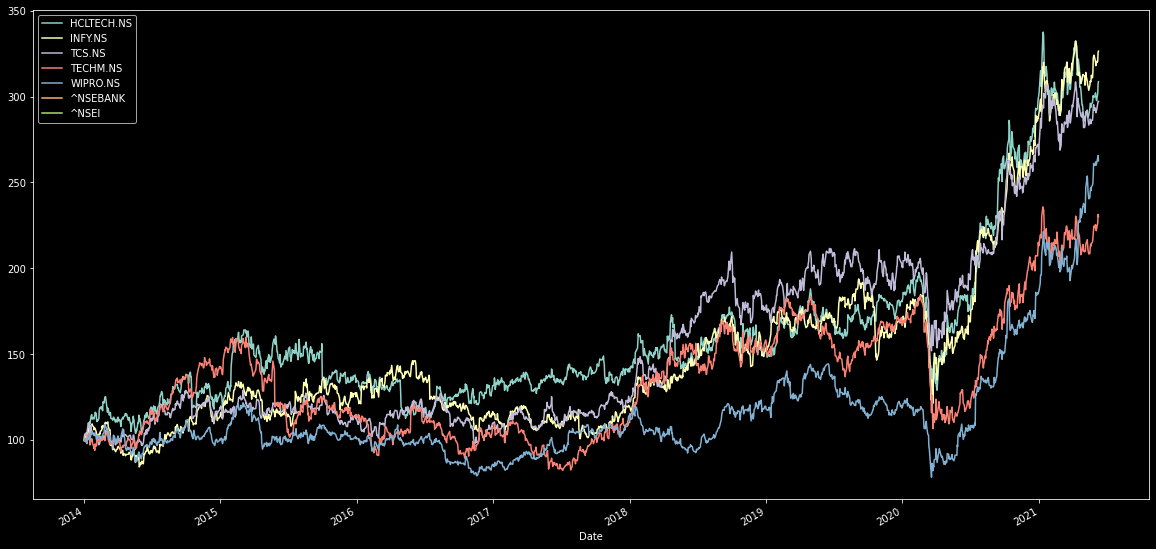

In [74]:
cp1.plot(figsize = (20, 10))